<a href="https://colab.research.google.com/github/mohamedihab10/projects/blob/main/heart_cleveland_upload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df= pd.read_csv('sample_data/heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
vars = ['age' ,'chol' ,'trestbps','thalach']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces( jitter=.3)

In [7]:
px.histogram(df, x = 'condition' ,color = 'condition')

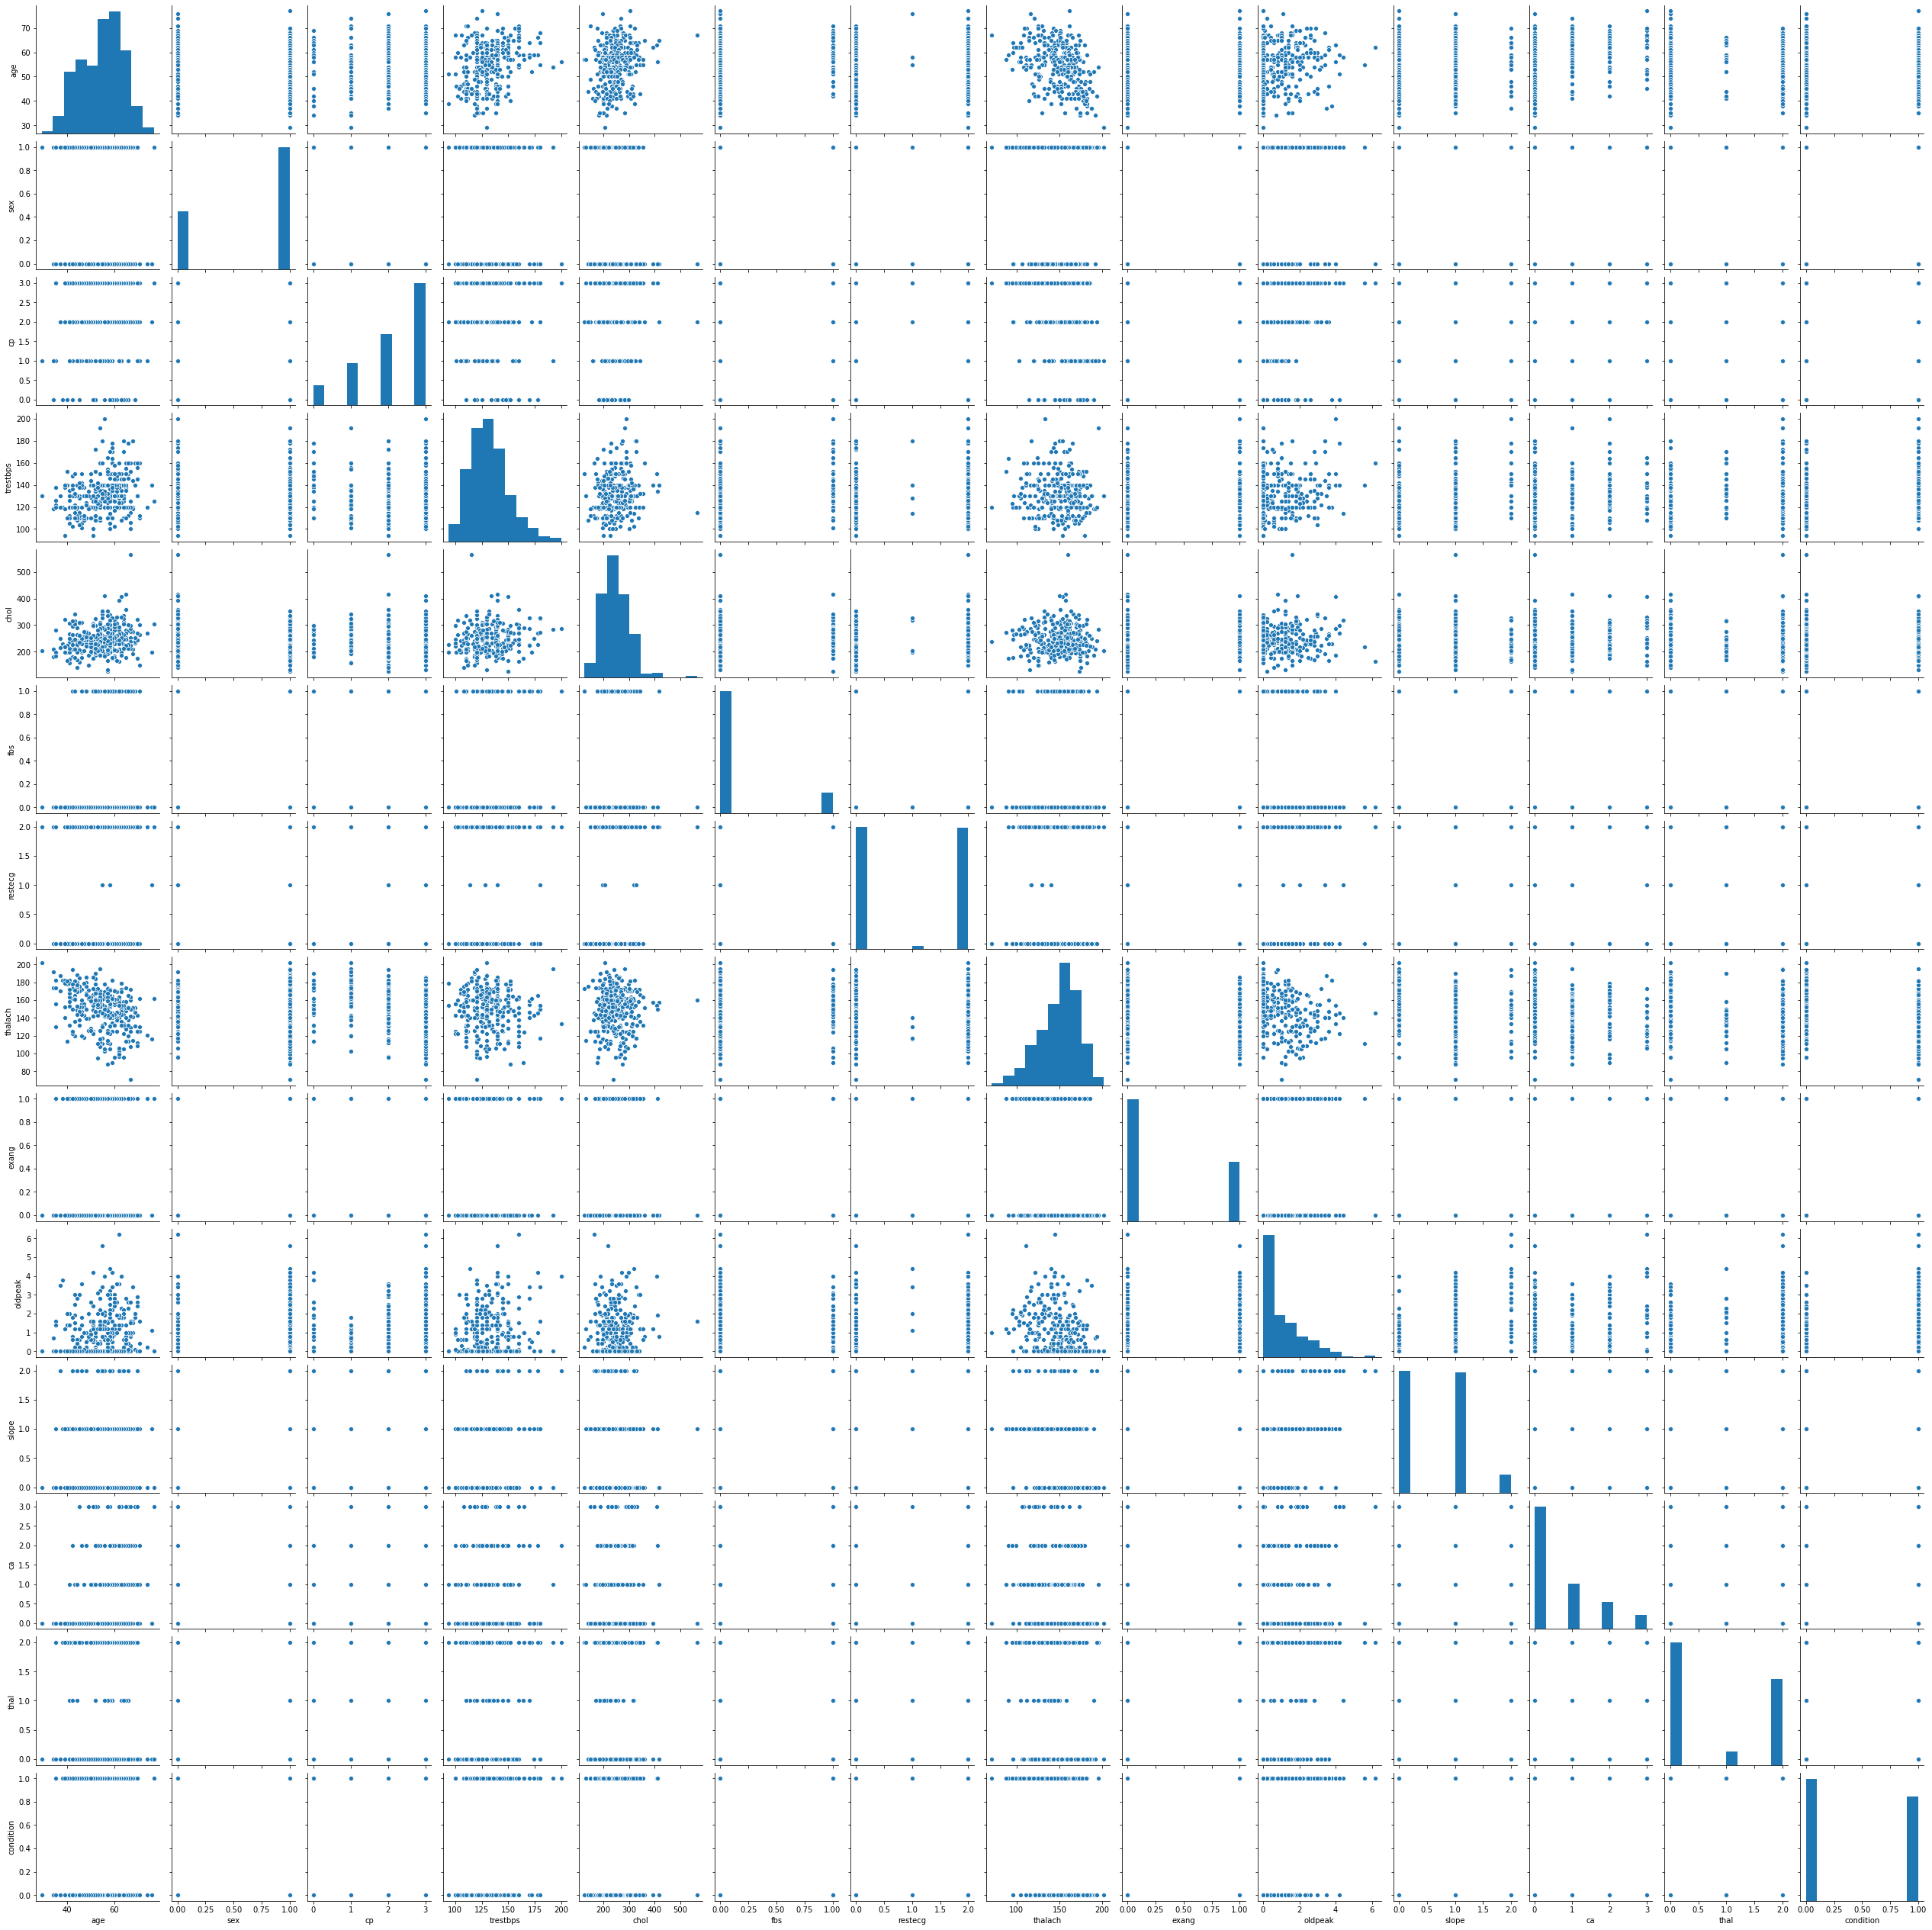

In [ ]:
sns.pairplot(df , kind = 'scatter')

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [9]:
X = df.iloc[: ,:-1]
y = df.iloc[:,-1]

In [10]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [11]:
y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
Sc=StandardScaler()


In [14]:
X_train_scaled=Sc.fit_transform(X_train)

In [15]:
X_test_scaled=Sc.fit_transform(X_test)

# Knn

In [16]:
from sklearn import metrics
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    classifier_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train_scaled,y_train)
    y_pred_knn=classifier_knn.predict(X_test_scaled)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred_knn)

    
    std_acc[n-1]=np.std(y_pred_knn==y_test)/np.sqrt(y_pred_knn.shape[0])

mean_acc

array([0.73737374, 0.76767677, 0.7979798 , 0.80808081, 0.83838384,
       0.83838384, 0.81818182, 0.81818182, 0.80808081, 0.83838384])

In [17]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8383838383838383 with k= 5


# Models 

In [18]:
classifier1=LogisticRegression()
classifier2=SVC()
classifier3=KNeighborsClassifier(n_neighbors=5)

In [19]:
classifier1.fit(X_train_scaled,y_train)


LogisticRegression()

In [20]:
classifier2.fit(X_train_scaled,y_train)


SVC()

In [21]:
classifier3.fit(X_train_scaled,y_train)


KNeighborsClassifier()

**Evaluation for classification models using accuracy**

# Training score

In [22]:
#Score of logistic regression classifier, training score

classifier1.score(X_train_scaled,y_train)

0.8636363636363636

In [23]:
# Score of SVC
classifier2.score(X_train_scaled,y_train)

0.9141414141414141

In [24]:
# Score of KNN
classifier3.score(X_train_scaled,y_train)

0.8838383838383839

# Testing score 

In [25]:
# Prediction and scoring using Logistic regression 

y_pred1=classifier1.predict(X_test_scaled)

In [26]:
classifier1.score(X_test_scaled,y_test)

0.8181818181818182

In [27]:
# Prediction and scoring using SVC
y_pred2=classifier2.predict(X_test_scaled)

In [28]:
classifier2.score(X_test_scaled,y_test)

0.8383838383838383

In [29]:
# Prediction and scoring using KNN
y_pred3=classifier3.predict(X_test_scaled)

In [30]:
classifier3.score(X_test_scaled,y_test)

0.8383838383838383

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred1, labels=[1,0]))

[[36  7]
 [11 45]]


Confusion matrix, without normalization
[[36  7]
 [11 45]]


<Figure size 1440x504 with 0 Axes>

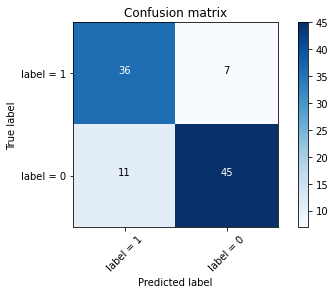

In [32]:
plt.figure(figsize = (20,7))
cnf_matrix = confusion_matrix(y_test, y_pred1, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['label = 1','label = 0'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[38  5]
 [11 45]]


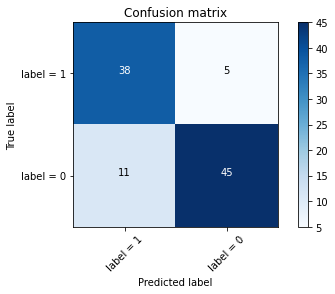

In [33]:
cnf_matrix = confusion_matrix(y_test, y_pred2, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['label = 1','label = 0'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[37  6]
 [10 46]]


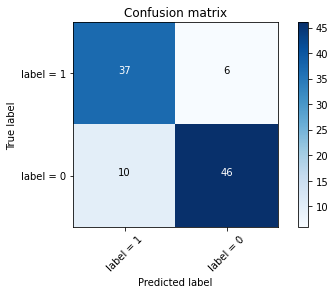

In [34]:
cnf_matrix = confusion_matrix(y_test, y_pred3, labels=[1,0])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['label = 1','label = 0'],normalize= False,  title='Confusion matrix')

In [35]:
 classification_report(y_test , y_pred1)


'              precision    recall  f1-score   support\n\n           0       0.87      0.80      0.83        56\n           1       0.77      0.84      0.80        43\n\n    accuracy                           0.82        99\n   macro avg       0.82      0.82      0.82        99\nweighted avg       0.82      0.82      0.82        99\n'

In [36]:
classification_report(y_test , y_pred2)


'              precision    recall  f1-score   support\n\n           0       0.90      0.80      0.85        56\n           1       0.78      0.88      0.83        43\n\n    accuracy                           0.84        99\n   macro avg       0.84      0.84      0.84        99\nweighted avg       0.85      0.84      0.84        99\n'

In [37]:
classification_report(y_test , y_pred3)

'              precision    recall  f1-score   support\n\n           0       0.88      0.82      0.85        56\n           1       0.79      0.86      0.82        43\n\n    accuracy                           0.84        99\n   macro avg       0.84      0.84      0.84        99\nweighted avg       0.84      0.84      0.84        99\n'